In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Agrega la carpeta src/ al path
sys.path.append(os.path.abspath(".."))

In [2]:
# Lectura bases
df_ = pd.read_csv('../data/base.csv')

# Guardar copia
df = df_.copy()

# Head
df.head()

,element_id,site_id,seller_id,Dominio_normalizado,Titulo,Marca,Precio,Rule,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2
0,ARG1000130348,ARGENTINA,924394736,COMPUTER_PROCESSORS,Microprocesador Intel Core I3 12100 12mb Bx807...,Intel,222599.0,NaN,0.11,1,0,0,0,0,0
1,ARG1002056504,ARGENTINA,60385780,COMPUTER_MONITORS,Monitor Gamer Samsung Con Pantalla De 25 60hz...,Samsung,767000.0,NaN,0.29,1,0,0,0,0,0
2,ARG1002630435,ARGENTINA,1085316688,SUNGLASSES,Anteojos De Sol Polarizados Ray-ban Erika Clas...,Ray-Ban,246510.0,NaN,0.51,1,0,0,0,0,0
3,ARG1003499360,ARGENTINA,189266308,HARD_DRIVES_AND_SSDS,Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...,Kingston,179999.0,NaN,0.32,1,0,0,0,0,0
4,ARG1004623658,ARGENTINA,127503700,RAM_MEMORY_MODULES,Memoria Ram Valueram Color Verde 8gb 1 Kingsto...,Kingston,22399.0,NaN,0.80,1,0,0,0,0,0


In [3]:
# Homologar precios (usd)
from src.data_preprocessing import create_usd_price_column

df_w_usd = create_usd_price_column(df)

In [4]:
# Mostrar información general del DataFrame
def display_basic_info(df):
    """
    Muestra la información básica del DataFrame, incluyendo
    la cantidad de filas, columnas y tipos de datos.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    print("Información básica del DataFrame:")
    print("-"*40)
    print(f"Filas: {df.shape[0]}")
    print(f"Columnas: {df.shape[1]}")
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nMuestra algunas filas:")
    display(df.head(5))

# Uso:
display_basic_info(df_w_usd)

Información básica del DataFrame:
----------------------------------------
Filas: 40372
Columnas: 16

Tipos de datos:
element_id              object
site_id                 object
seller_id                int64
Dominio_normalizado     object
Titulo                  object
Marca                   object
Precio                 float64
Rule                    object
Score                  float64
Total                    int64
Moderado                 int64
Fake                     int64
Rollback                 int64
FK_TEST1                 int64
FK_TEST2                 int64
precio_usd             float64
dtype: object

Muestra algunas filas:


,element_id,site_id,seller_id,Dominio_normalizado,Titulo,Marca,Precio,Rule,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2,precio_usd
0,ARG1000130348,ARGENTINA,924394736,COMPUTER_PROCESSORS,Microprocesador Intel Core I3 12100 12mb Bx807...,Intel,222599.0,NaN,0.11,1,0,0,0,0,0,202.362727
1,ARG1002056504,ARGENTINA,60385780,COMPUTER_MONITORS,Monitor Gamer Samsung Con Pantalla De 25 60hz...,Samsung,767000.0,NaN,0.29,1,0,0,0,0,0,697.272727
2,ARG1002630435,ARGENTINA,1085316688,SUNGLASSES,Anteojos De Sol Polarizados Ray-ban Erika Clas...,Ray-Ban,246510.0,NaN,0.51,1,0,0,0,0,0,224.100000
3,ARG1003499360,ARGENTINA,189266308,HARD_DRIVES_AND_SSDS,Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...,Kingston,179999.0,NaN,0.32,1,0,0,0,0,0,163.635455
4,ARG1004623658,ARGENTINA,127503700,RAM_MEMORY_MODULES,Memoria Ram Valueram Color Verde 8gb 1 Kingsto...,Kingston,22399.0,NaN,0.80,1,0,0,0,0,0,20.362727


In [5]:
# Estadísticas descriptivas generales de las variables numéricas

def describe_numeric_columns(df):
    """
    Muestra un resumen estadístico de las columnas numéricas
    del DataFrame (count, mean, std, min, 25%, 50%, 75%, max).
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    numeric_desc = df.describe(include=[float, int])
    display(numeric_desc)

# Uso:
describe_numeric_columns(df_w_usd)

,seller_id,Precio,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2,precio_usd
count,4.037200e+04,4.037200e+04,40372.000000,40372.0,40372.000000,40372.000000,40372.000000,40372.000000,40372.000000,40372.000000
mean,1.911603e+09,2.455866e+05,0.428654,1.0,0.105965,0.111191,0.007580,0.047483,0.007282,339.079253
std,1.784332e+09,6.435465e+05,0.330362,0.0,0.307796,0.314372,0.086731,0.212673,0.085026,543.152648
min,4.281520e+05,1.117000e+01,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.734146
25%,6.440346e+08,6.767050e+02,0.150000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,53.446341
50%,1.217641e+09,4.299000e+03,0.310000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,129.219512
75%,2.609587e+09,1.549900e+05,0.810000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,341.435583
max,8.880437e+09,1.289990e+07,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,8785.108182


In [6]:
# Conteo de valores para variables categóricas importantes (site_id, Dominio_normalizado)

def count_categorical_values(df, columns):
    """
    Muestra el conteo de valores únicos para
    una lista de columnas categóricas.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columns (list): Lista con el nombre de las columnas categóricas.
    """
    for col in columns:
        print(f"Conteo de valores para la columna '{col}':")
        print(df[col].value_counts(dropna=False))
        print("-"*40)

# Uso:
count_categorical_values(df_w_usd, ['site_id', 'Dominio_normalizado'])

Conteo de valores para la columna 'site_id':
site_id
BRASIL       14142
ARGENTINA    11938
MEXICO        8378
CHILE         2116
COLOMBIA      2044
PERU          1754
Name: count, dtype: int64
----------------------------------------
Conteo de valores para la columna 'Dominio_normalizado':
Dominio_normalizado
CELLPHONES                             5222
WRISTWATCHES                           5189
PERFUMES                               3836
HEADPHONES                             3760
NOTEBOOKS                              3428
MEMORY_CARDS                           3327
SPEAKERS                               2299
INK_CARTRIDGES                         1502
SUNGLASSES                             1501
RAM_MEMORY_MODULES                     1443
HARD_DRIVES_AND_SSDS                   1425
TONERS                                 1143
COMPUTER_MONITORS                      1114
COMPUTER_PROCESSORS                     966
FACIAL_SKIN_CARE_PRODUCTS               886
SMARTWATCHES                 

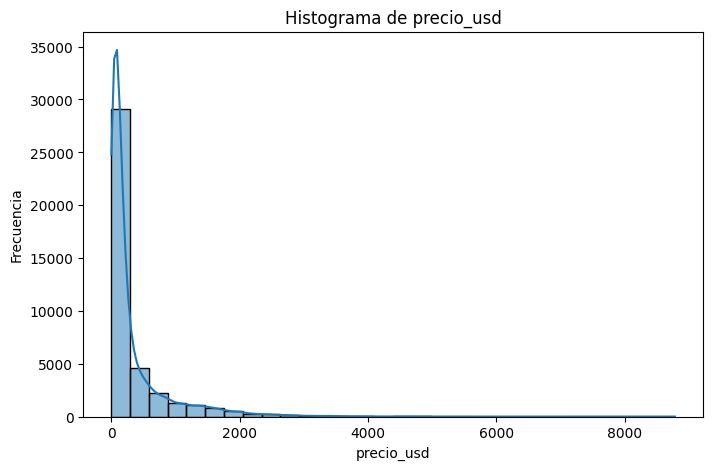

In [7]:
# Histograma de la variable Precio y precio_usd
def plot_histogram(df, column, bins=30):
    """
    Genera un histograma para la columna numérica especificada.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
        column (str): Nombre de la columna numérica.
        bins (int): Número de contenedores en el histograma.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=bins)
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

# Gráfico
plot_histogram(df_w_usd, 'precio_usd')

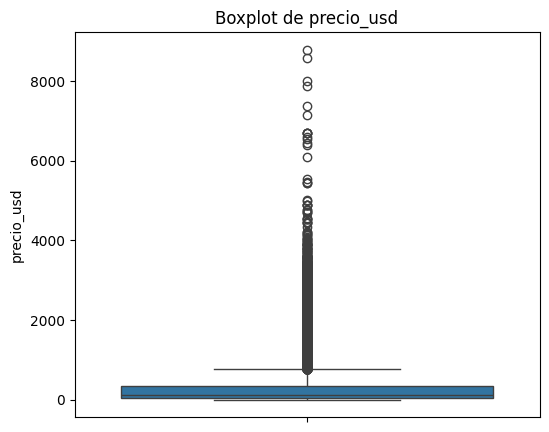

In [8]:
# Boxplot de Precio en USD, para detectar valores atípicos

def plot_boxplot(df, column):
    """
    Genera un boxplot para la columna numérica especificada
    para identificar valores atípicos.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
        column (str): Nombre de la columna numérica.
    """
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df, y=column)
    plt.title(f"Boxplot de {column}")
    plt.ylabel(column)
    plt.show()

# Uso:
plot_boxplot(df_w_usd, 'precio_usd')

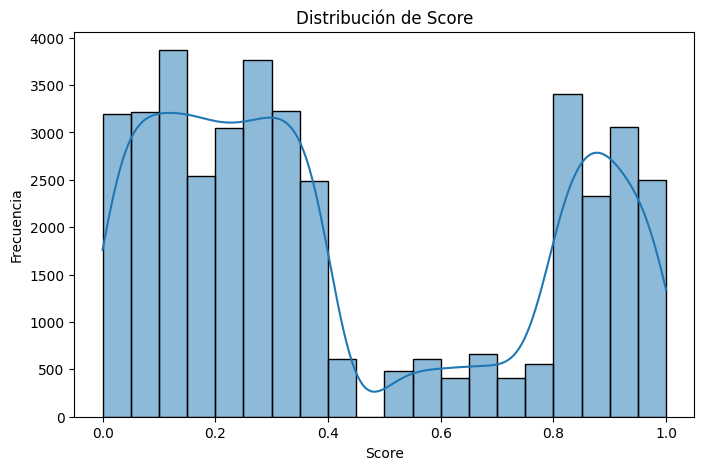

In [9]:
# Distribución de la variable Score

def plot_score_distribution(df):
    """
    Genera un histograma para la distribución de 'Score',
    que representa la puntuación dada por el modelo.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x='Score', kde=True, bins=20)
    plt.title("Distribución de Score")
    plt.xlabel("Score")
    plt.ylabel("Frecuencia")
    plt.show()

# Uso:
plot_score_distribution(df_w_usd)

,Métrica,Valor
0,freq_mod,0.105965
1,freq_fake,0.111191
2,freq_rollback_given_mod,0.071529
3,prop_fake_given_mod,0.923796
4,prop_fake_given_no_mod,0.014878
5,prop_mod_given_fake,0.880374
6,prop_mod_given_not_fake,0.009085


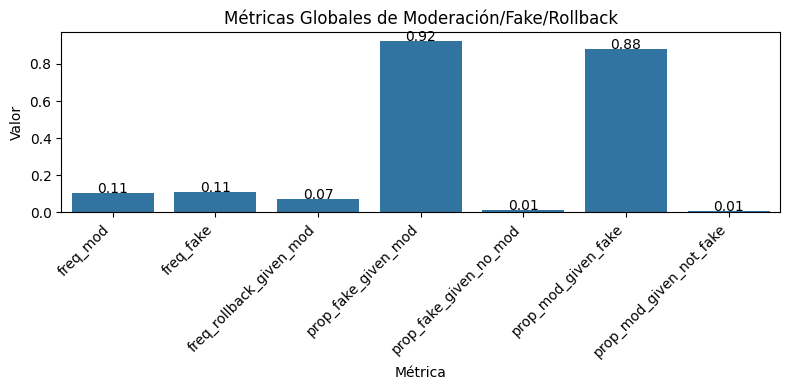

In [10]:
# Análisis global

def analyze_global_flags(df):
    """
    Calcula y muestra las siguientes métricas de manera global:
    1) Frecuencia relativa de los moderados
    2) Frecuencia relativa de los fake
    3) Frecuencia relativa de rollback dado que fueron moderados
    4) Proporción de artículos fake dado que fueron moderados
    5) Proporción de artículos fake dado que no fueron moderados
    6) Proporción de artículos moderados dado que son fake
    7) Proporción de artículos moderados dado que no son fake

    Además, muestra:
    - Una tabla con las métricas
    - Un gráfico de barras con cada métrica

    Args:
        df (pd.DataFrame): DataFrame con columnas:
            ['Moderado', 'Fake', 'Rollback'] (0 o 1).
    """
    total = len(df)

    # Contadores básicos
    total_mod = df['Moderado'].sum()       # # artículos moderados
    total_fake = df['Fake'].sum()          # # artículos fake
    total_not_mod = total - total_mod      # # artículos no moderados
    total_not_fake = total - total_fake    # # artículos no fake

    # Rollback solo tiene sentido si Moderado=1
    rollback_and_mod = df[(df['Rollback'] == 1) & (df['Moderado'] == 1)].shape[0]

    # Fake and mod
    fake_and_mod = df[(df['Fake'] == 1) & (df['Moderado'] == 1)].shape[0]
    # Fake and not mod
    fake_and_not_mod = df[(df['Fake'] == 1) & (df['Moderado'] == 0)].shape[0]
    # Mod and not fake
    mod_and_not_fake = df[(df['Moderado'] == 1) & (df['Fake'] == 0)].shape[0]
    # Not mod and not fake
    # (Para esta métrica no se pide directamente, pero la usaremos si hace falta.)

    # 1) Frecuencia relativa de moderados => (# moderados) / (# total)
    freq_mod = total_mod / total if total > 0 else 0

    # 2) Frecuencia relativa de fake => (# fake) / (# total)
    freq_fake = total_fake / total if total > 0 else 0

    # 3) Frecuencia relativa de rollback dado que fueron moderados => (# rollback & mod) / (# moderados)
    freq_rollback_given_mod = rollback_and_mod / total_mod if total_mod > 0 else 0

    # 4) Proporción de artículos fake dado que fueron moderados => (# fake & mod) / (# moderados)
    p_fake_given_mod = fake_and_mod / total_mod if total_mod > 0 else 0

    # 5) Proporción de artículos fake dado que no fueron moderados => (# fake & not_mod) / (# not_mod)
    p_fake_given_no_mod = fake_and_not_mod / total_not_mod if total_not_mod > 0 else 0

    # 6) Proporción de artículos moderados dado que son fake => (# fake & mod) / (# fake)
    p_mod_given_fake = fake_and_mod / total_fake if total_fake > 0 else 0

    # 7) Proporción de artículos moderados dado que no son fake => (# mod & not_fake) / (# not_fake)
    p_mod_given_not_fake = mod_and_not_fake / total_not_fake if total_not_fake > 0 else 0

    # Crear diccionario con métricas
    metrics_dict = {
        'freq_mod': freq_mod,
        'freq_fake': freq_fake,
        'freq_rollback_given_mod': freq_rollback_given_mod,
        'prop_fake_given_mod': p_fake_given_mod,
        'prop_fake_given_no_mod': p_fake_given_no_mod,
        'prop_mod_given_fake': p_mod_given_fake,
        'prop_mod_given_not_fake': p_mod_given_not_fake
    }

    # Mostrar en forma de DataFrame
    metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Métrica', 'Valor'])
    display(metrics_df)

    # Graficar en barras
    plt.figure(figsize=(8, 4))
    sns.barplot(data=metrics_df, x='Métrica', y='Valor')
    plt.title("Métricas Globales de Moderación/Fake/Rollback")
    plt.xticks(rotation=45, ha='right')
    # Mostrar valores sobre cada barra
    for i, row in metrics_df.iterrows():
        plt.text(i, row['Valor'] + 0.001, f"{row['Valor']:.2f}", ha='center')
    plt.tight_layout()
    plt.show()

# Uso
analyze_global_flags(df_w_usd)


(    Grouping  TotalArticles  Moderated  Fake  RollbackMod  FreqArticlesGlobal  \
 0  ARGENTINA          11938       1262  1352           74            0.295700   
 1     BRASIL          14142       1479  1585           84            0.350292   
 2      CHILE           2116        221   225           31            0.052413   
 3   COLOMBIA           2044        208   205           20            0.050629   
 4     MEXICO           8378        870   892           81            0.207520   
 5       PERU           1754        238   230           16            0.043446   
 
    FreqModeratedByGroup  FreqModeratedGlobal  FreqFakeByGroup  FreqFakeGlobal  \
 0              0.105713             0.294998         0.113252        0.301181   
 1              0.104582             0.345722         0.112077        0.353085   
 2              0.104442             0.051660         0.106333        0.050123   
 3              0.101761             0.048621         0.100294        0.045667   
 4            

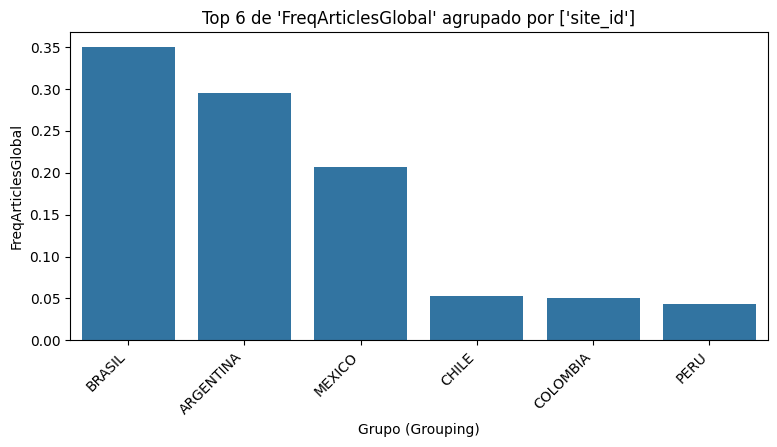

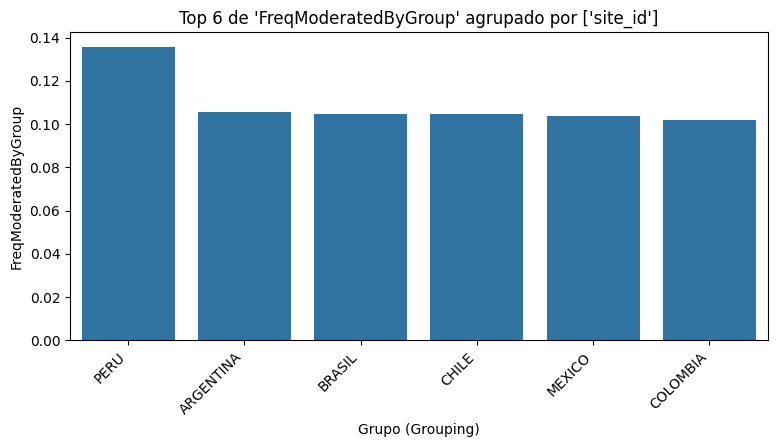

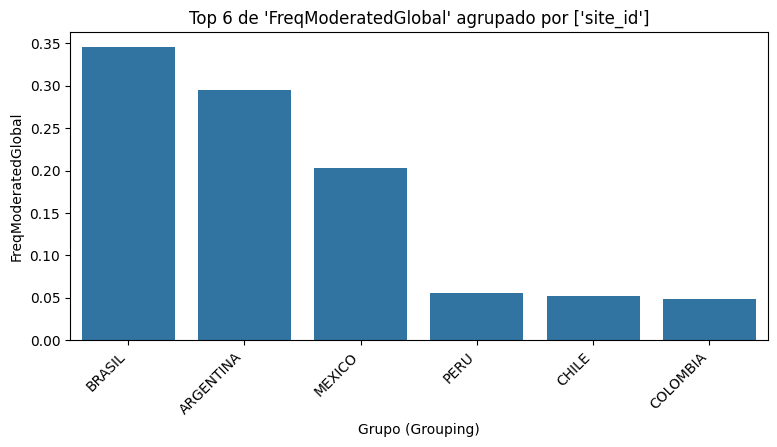

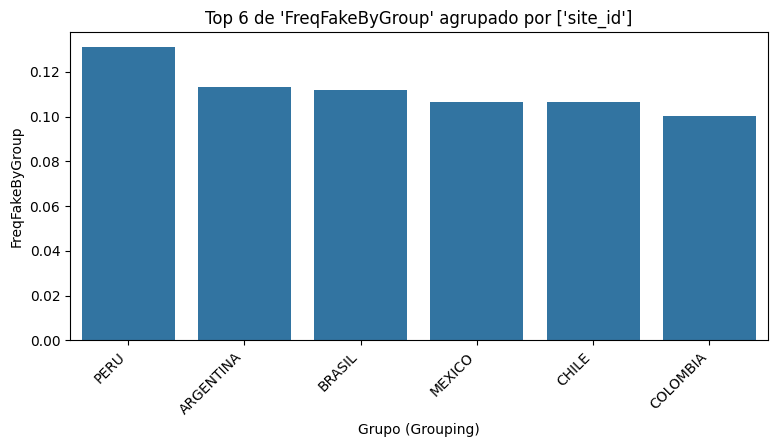

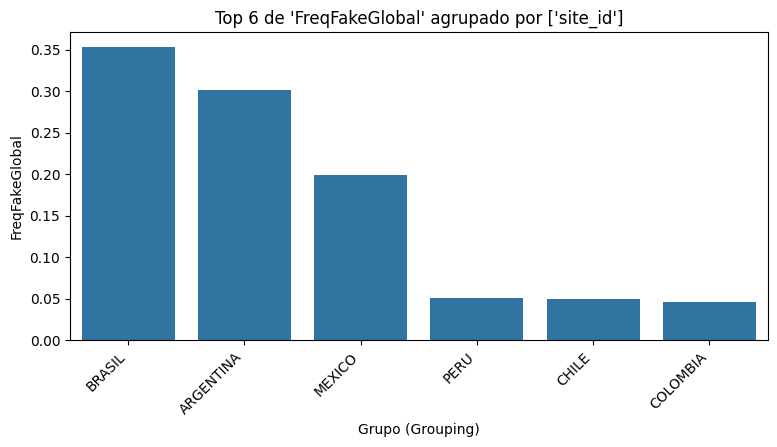

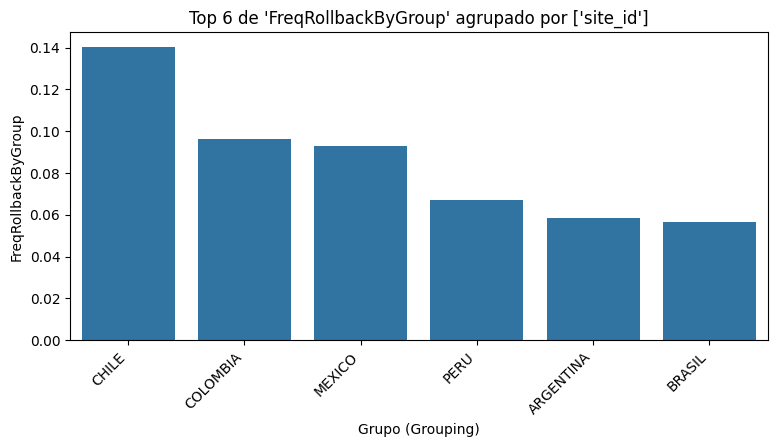

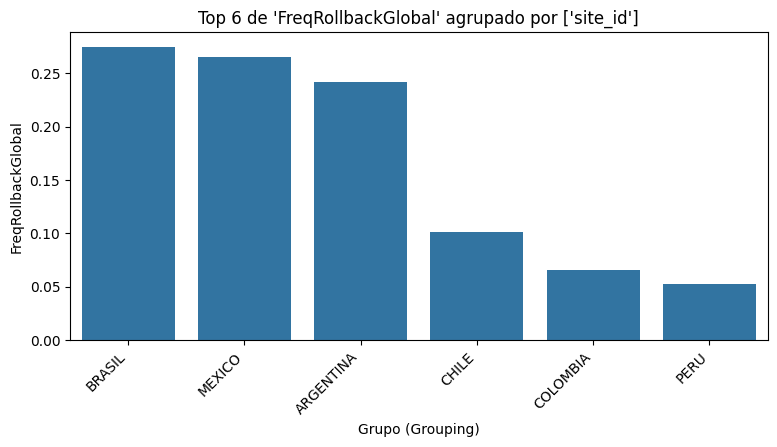

In [11]:
# Métricas por conjuntos de variables
from src.flag_analysis import analyze_flags_by_columns

# Por país
analyze_flags_by_columns(df=df_w_usd, group_cols="site_id", top_n=10)

(                               Grouping  TotalArticles  Moderated  Fake  \
 0   AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS             16          5     3   
 1               BODY_SKIN_CARE_PRODUCTS            184         22    23   
 2                            CELLPHONES           5222        523   565   
 3                         COMPUTER_MICE            290         33    37   
 4                     COMPUTER_MONITORS           1114        117   119   
 5                   COMPUTER_PROCESSORS            966         89   103   
 6              DATA_CABLES_AND_ADAPTERS            257         59    24   
 7             FACIAL_SKIN_CARE_PRODUCTS            886         95   103   
 8                GAMEPADS_AND_JOYSTICKS            102         16     7   
 9                  HARD_DRIVES_AND_SSDS           1425        145   157   
 10                           HEADPHONES           3760        396   436   
 11                       INK_CARTRIDGES           1502        165   181   
 12         

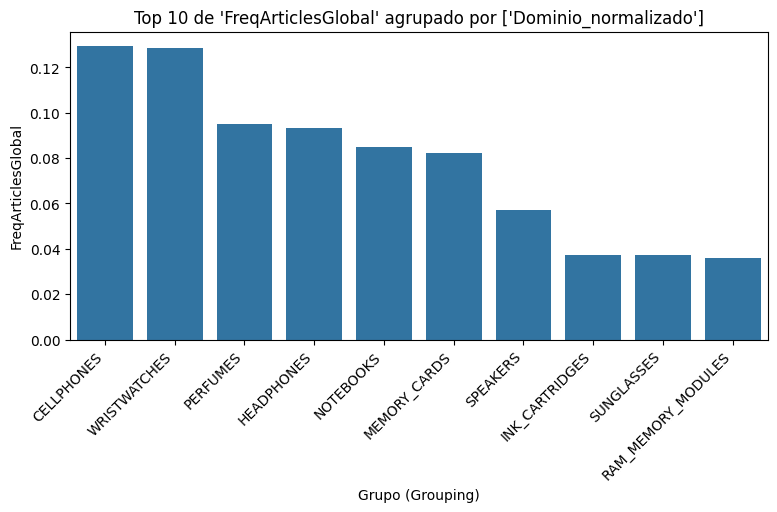

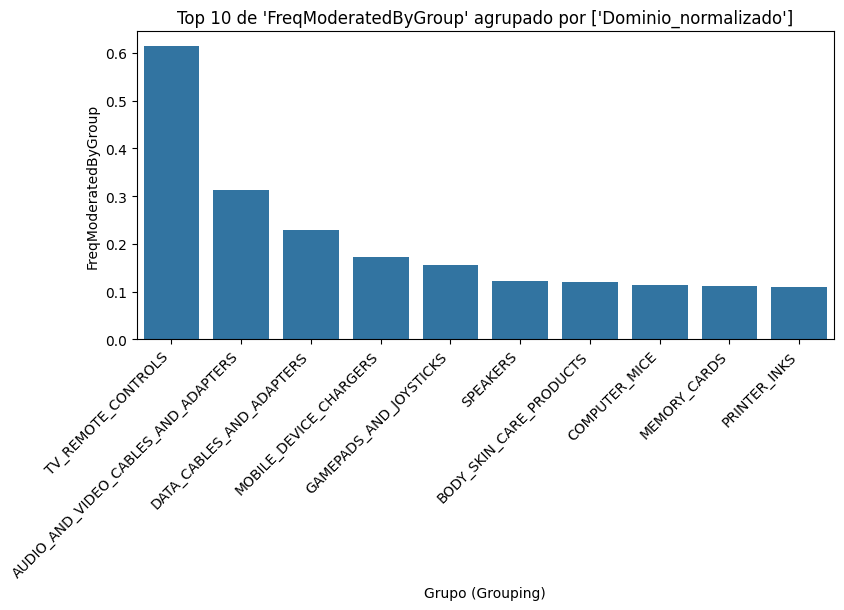

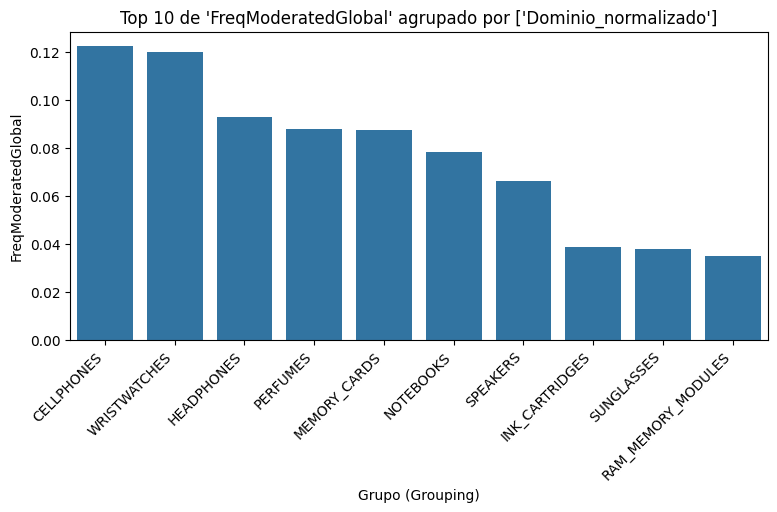

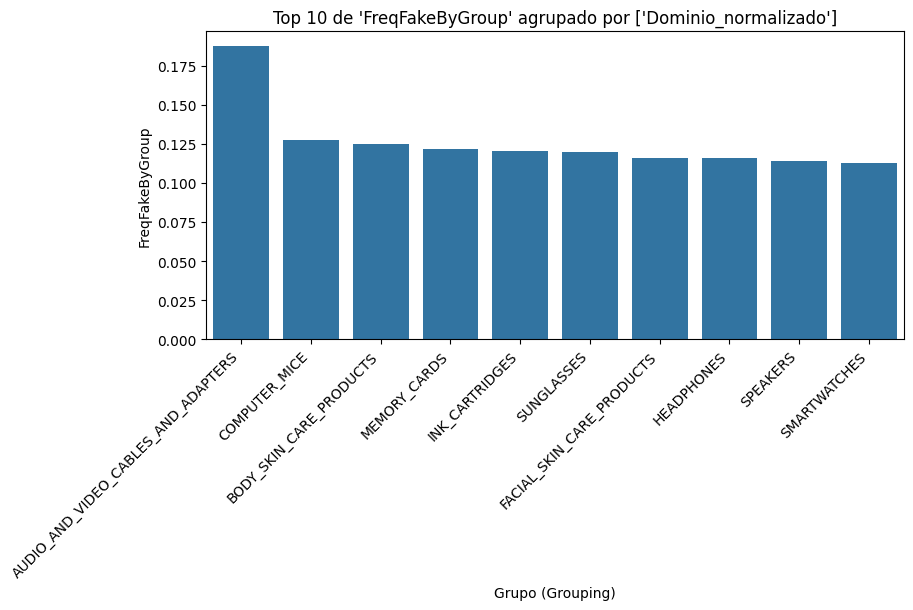

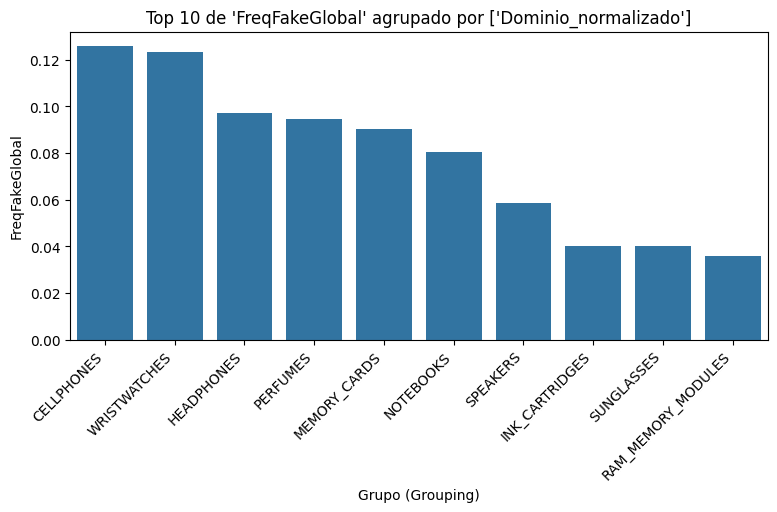

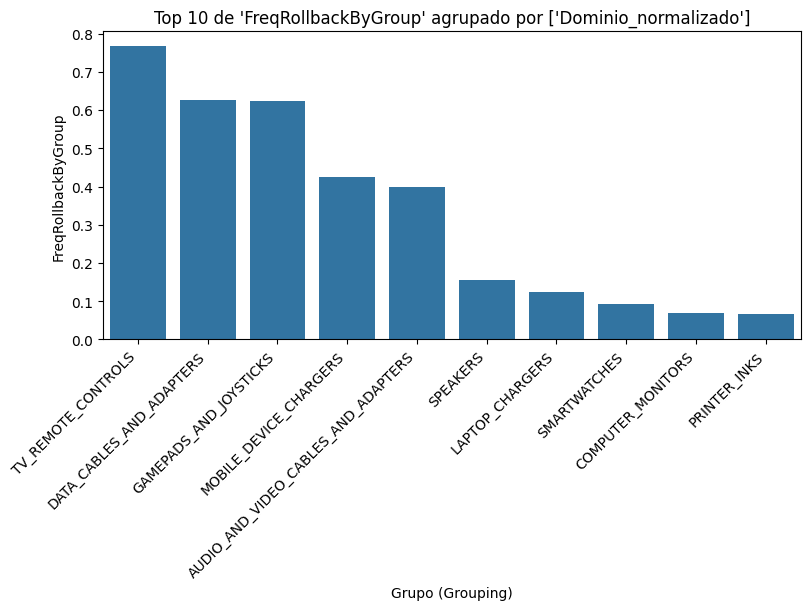

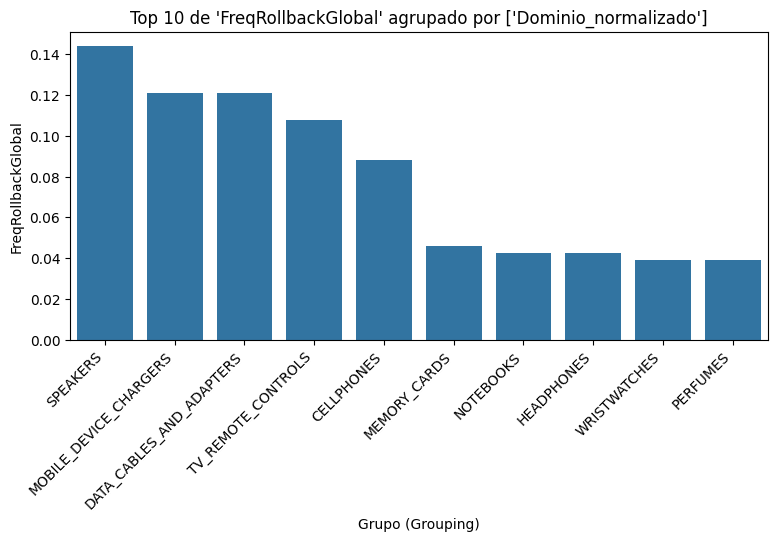

In [12]:
# Por dominio
analyze_flags_by_columns(df=df_w_usd, group_cols="Dominio_normalizado", top_n=10)

(       Grouping  TotalArticles  Moderated  Fake  RollbackMod  \
 0  FK_ATTRIBUTE           1267       1267  1187           71   
 1      FK_MODEL            432        432   432            0   
 2      FK_PRICE           2579       2579  2333          235   
 
    FreqArticlesGlobal  FreqModeratedByGroup  FreqModeratedGlobal  \
 0            0.031383                   1.0             0.296166   
 1            0.010700                   1.0             0.100982   
 2            0.063881                   1.0             0.602852   
 
    FreqFakeByGroup  FreqFakeGlobal  FreqRollbackByGroup  FreqRollbackGlobal  
 0         0.936859        0.264424             0.056038            0.232026  
 1         1.000000        0.096235             0.000000            0.000000  
 2         0.904614        0.519715             0.091121            0.767974  ,
 {'FreqArticlesGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqModeratedByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqModeratedGlobal'

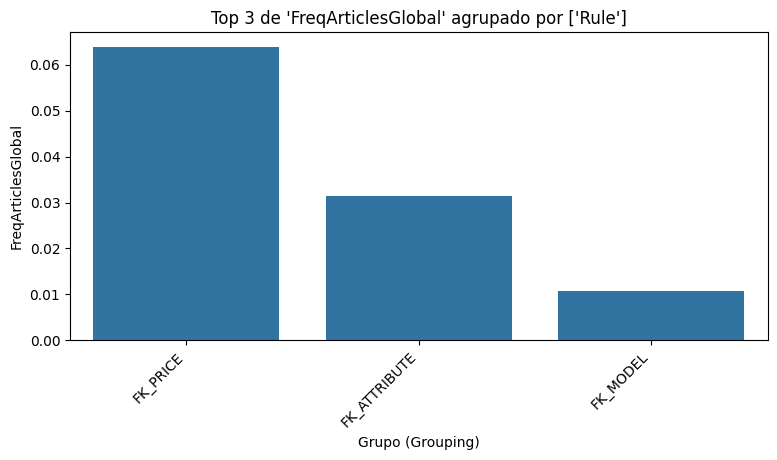

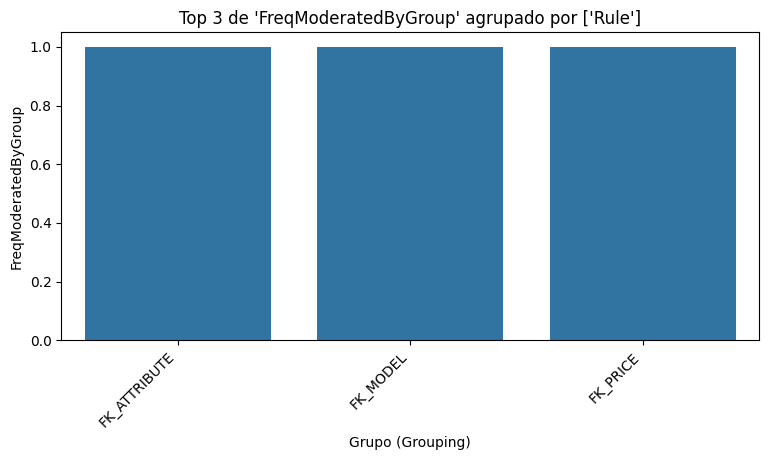

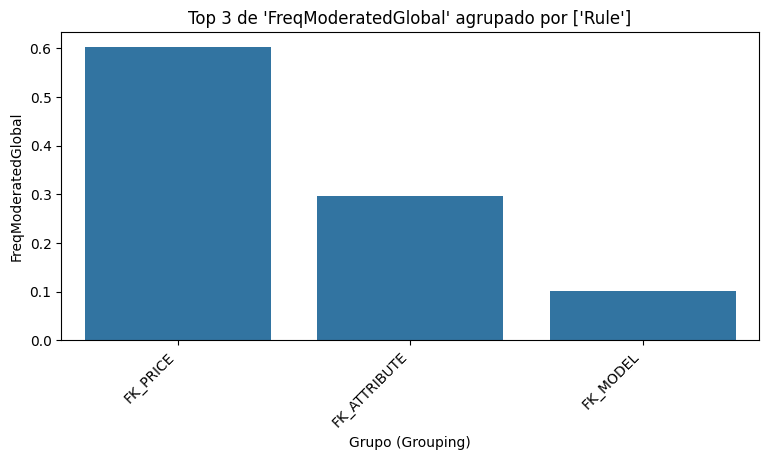

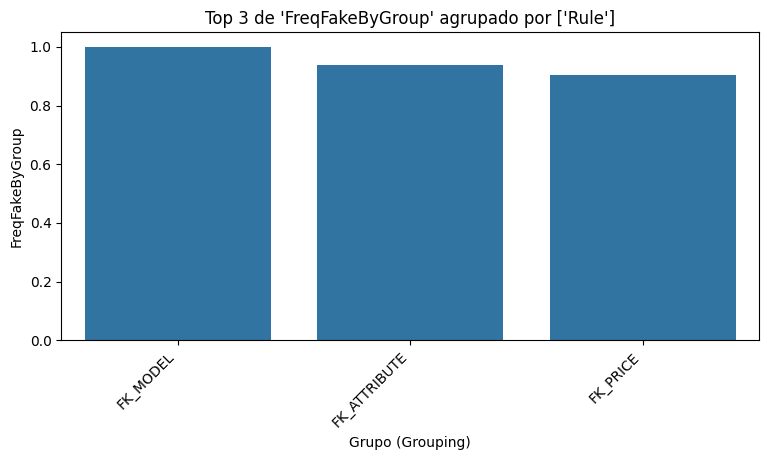

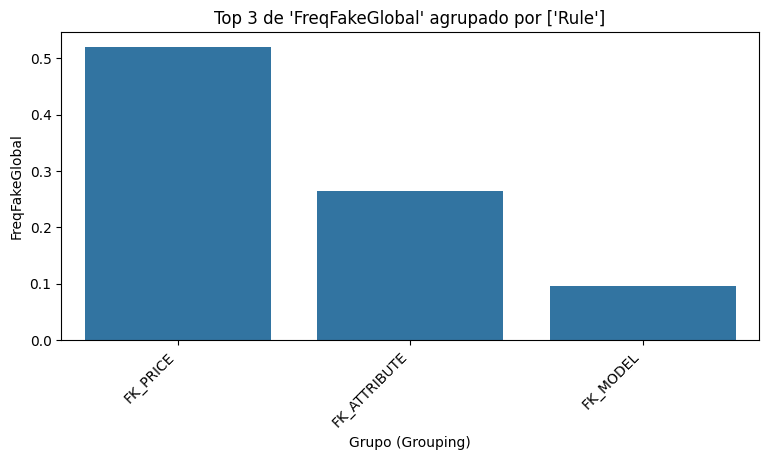

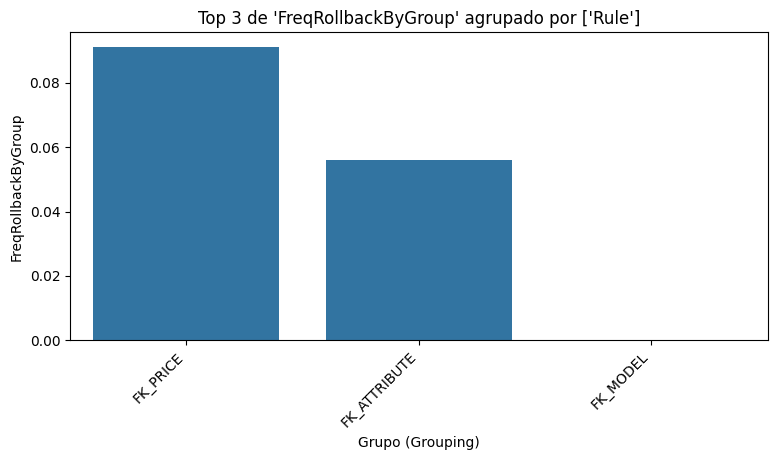

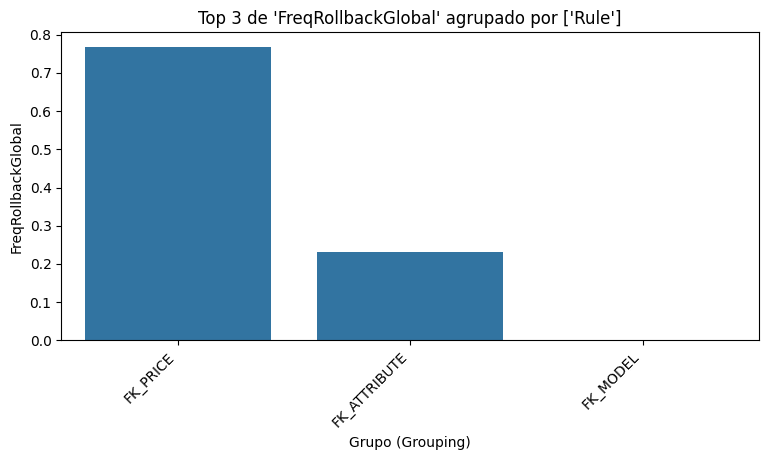

In [13]:
# Por reglas moderación
analyze_flags_by_columns(df=df_w_usd, group_cols="Rule", top_n=10)

(   Grouping  TotalArticles  Moderated  Fake  RollbackMod  FreqArticlesGlobal  \
 0         0          38455       2586  2579          303            0.952517   
 1         1           1917       1692  1910            3            0.047483   
 
    FreqModeratedByGroup  FreqModeratedGlobal  FreqFakeByGroup  FreqFakeGlobal  \
 0              0.067247             0.604488         0.067065        0.574515   
 1              0.882629             0.395512         0.996348        0.425485   
 
    FreqRollbackByGroup  FreqRollbackGlobal  
 0             0.117169            0.990196  
 1             0.001773            0.009804  ,
 {'FreqArticlesGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqModeratedByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqModeratedGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqFakeByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqFakeGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqRollbackByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqRollbackGl

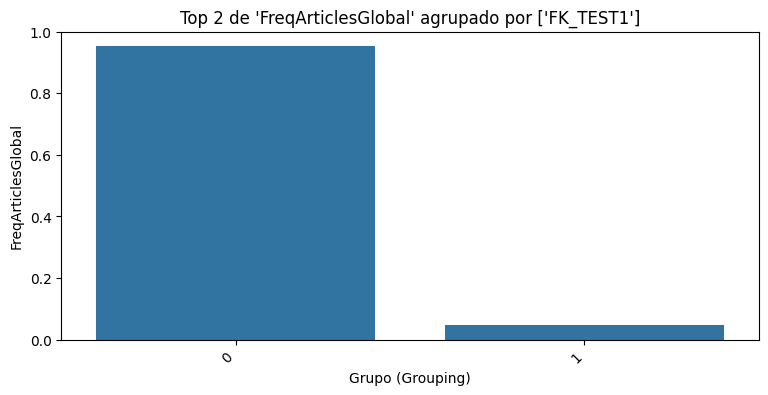

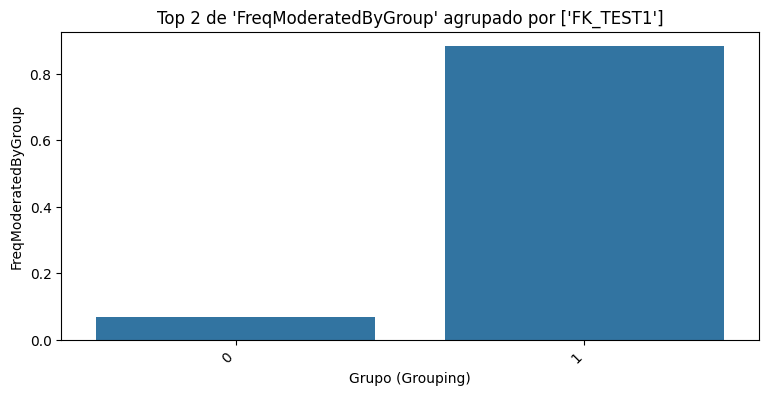

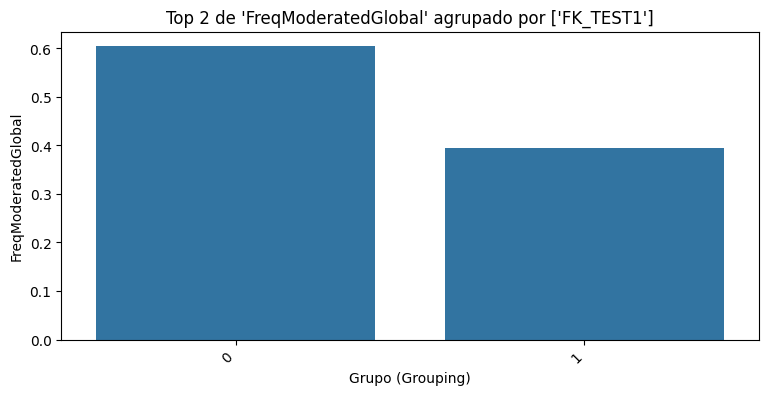

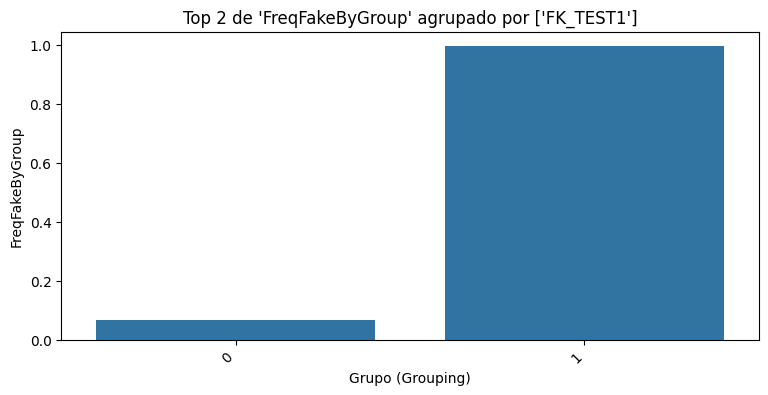

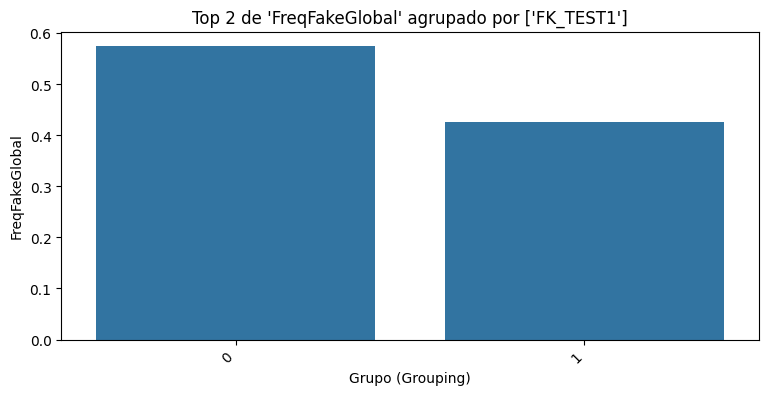

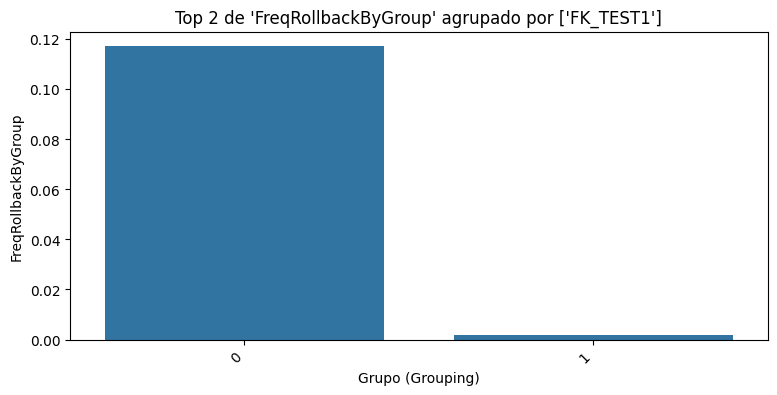

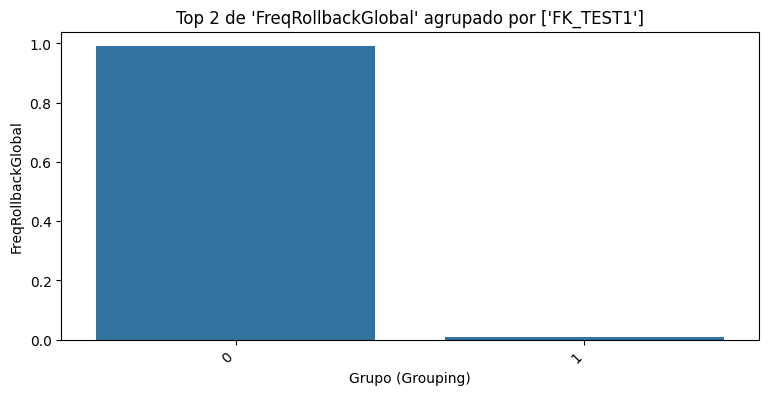

In [14]:
# Por reglas test, regla 1
analyze_flags_by_columns(df=df_w_usd, group_cols="FK_TEST1", top_n=10)

(   Grouping  TotalArticles  Moderated  Fake  RollbackMod  FreqArticlesGlobal  \
 0         0          40078       4017  4207          294            0.992718   
 1         1            294        261   282           12            0.007282   
 
    FreqModeratedByGroup  FreqModeratedGlobal  FreqFakeByGroup  FreqFakeGlobal  \
 0              0.100230              0.93899         0.104970         0.93718   
 1              0.887755              0.06101         0.959184         0.06282   
 
    FreqRollbackByGroup  FreqRollbackGlobal  
 0             0.073189            0.960784  
 1             0.045977            0.039216  ,
 {'FreqArticlesGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqModeratedByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqModeratedGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqFakeByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqFakeGlobal': <Figure size 900x400 with 1 Axes>,
  'FreqRollbackByGroup': <Figure size 900x400 with 1 Axes>,
  'FreqRollbackGl

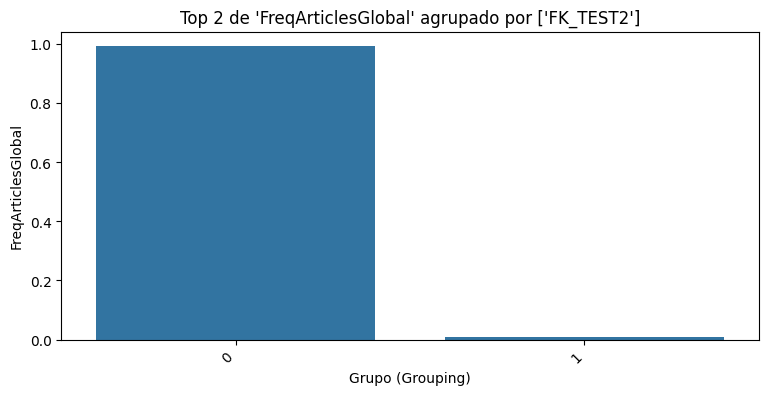

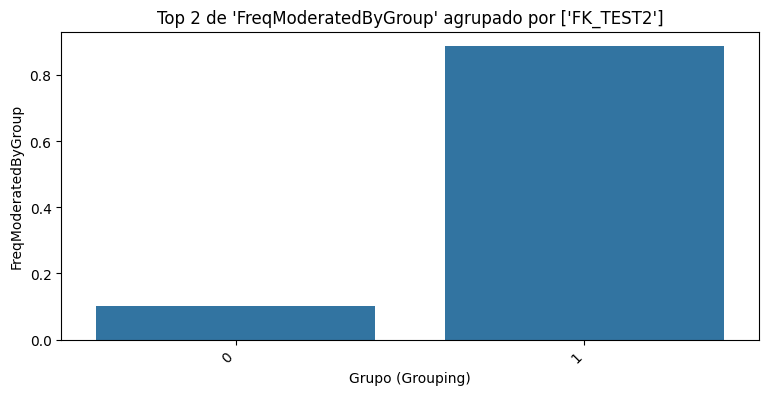

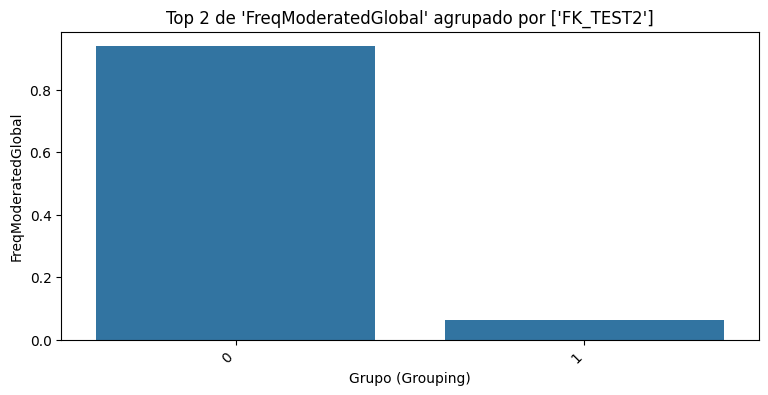

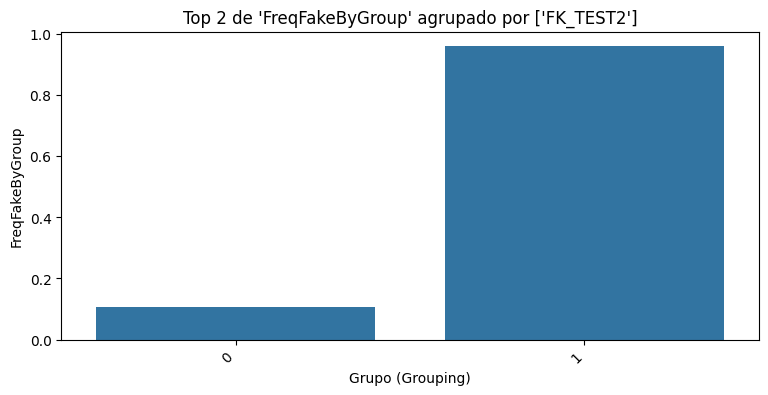

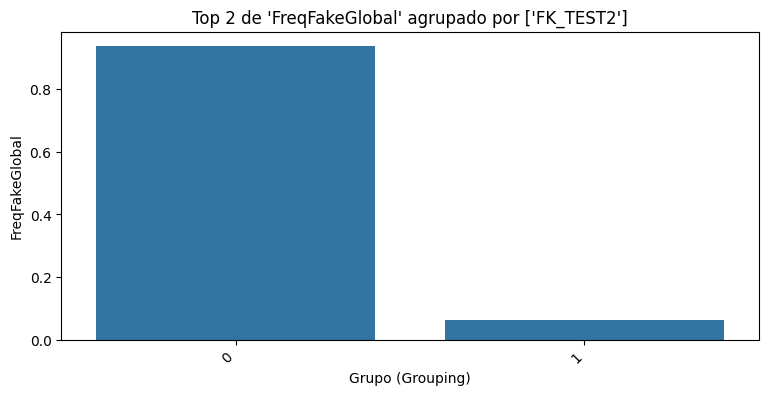

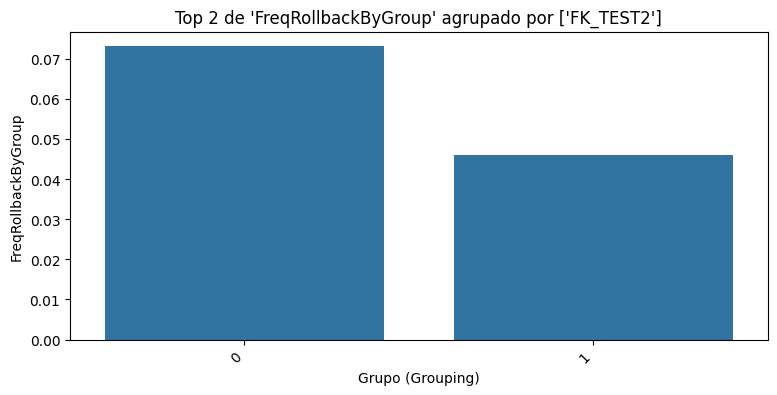

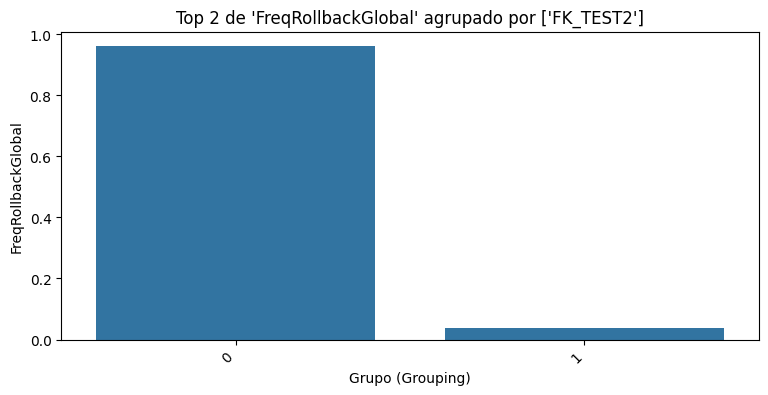

In [15]:
# Por reglas test, regla 2
analyze_flags_by_columns(df=df_w_usd, group_cols="FK_TEST2", top_n=10)

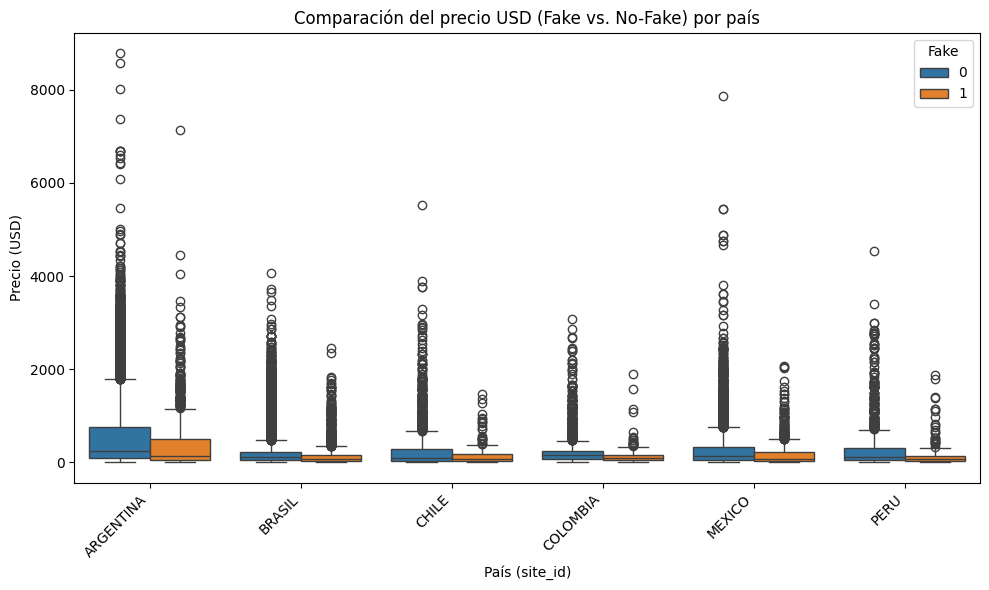

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def boxplot_price_fake_vs_not_fake(df):
    """
    Genera un boxplot que compara 'precio_usd' entre productos fake y no fake
    para cada país (site_id). El eje x muestra cada país, y dentro de cada país
    aparecen dos boxplots: uno para Fake=1 y otro para Fake=0.

    Args:
        df (pd.DataFrame): DataFrame con columnas:
            - 'site_id': identificador de país.
            - 'Fake': flag 0/1 que indica si el producto es fake.
            - 'precio_usd': precio en dólares de la publicación.
    """
    # Asegurar que Fake sea una columna categórica para que Seaborn lo entienda bien
    df['Fake'] = df['Fake'].astype('category')

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='site_id', y='precio_usd', hue='Fake')
    
    plt.title("Comparación del precio USD (Fake vs. No-Fake) por país")
    plt.xlabel("País (site_id)")
    plt.ylabel("Precio (USD)")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Fake')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
boxplot_price_fake_vs_not_fake(df_w_usd)


C:\Users\a_lit\AppData\Local\Temp\ipykernel_27384\172555977.py:71: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'RollbackMod': grouped.apply(lambda g: ((g['Rollback'] == 1) & (g['Moderado'] == 1)).sum())


,TotalArticles,Moderated,Fake,RollbackMod,FreqArticlesGlobal,FreqModeratedByDomain,FreqModeratedGlobal,FreqFakeByDomain,FreqFakeGlobal,FreqRollbackByDomain,FreqRollbackGlobal
Dominio_normalizado,,,,,,,,,,,
AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,16,5.0,3.0,2,0.000396,0.312500,0.001169,0.187500,0.000668,0.400000,0.006536
BODY_SKIN_CARE_PRODUCTS,184,22.0,23.0,0,0.004558,0.119565,0.005143,0.125000,0.005124,0.000000,0.000000
CELLPHONES,5222,523.0,565.0,27,0.129347,0.100153,0.122253,0.108196,0.125863,0.051625,0.088235
COMPUTER_MICE,290,33.0,37.0,1,0.007183,0.113793,0.007714,0.127586,0.008242,0.030303,0.003268
COMPUTER_MONITORS,1114,117.0,119.0,8,0.027593,0.105027,0.027349,0.106822,0.026509,0.068376,0.026144
COMPUTER_PROCESSORS,966,89.0,103.0,0,0.023927,0.092133,0.020804,0.106625,0.022945,0.000000,0.000000
DATA_CABLES_AND_ADAPTERS,257,59.0,24.0,37,0.006366,0.229572,0.013791,0.093385,0.005346,0.627119,0.120915
FACIAL_SKIN_CARE_PRODUCTS,886,95.0,103.0,5,0.021946,0.107223,0.022207,0.116253,0.022945,0.052632,0.016340
GAMEPADS_AND_JOYSTICKS,102,16.0,7.0,10,0.002527,0.156863,0.003740,0.068627,0.001559,0.625000,0.032680


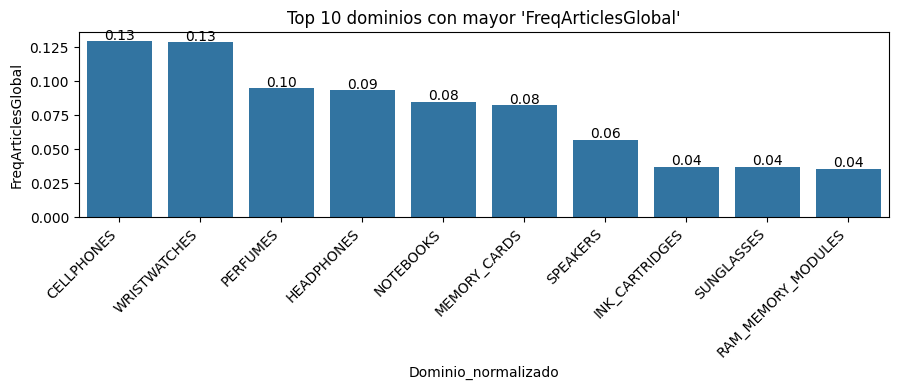

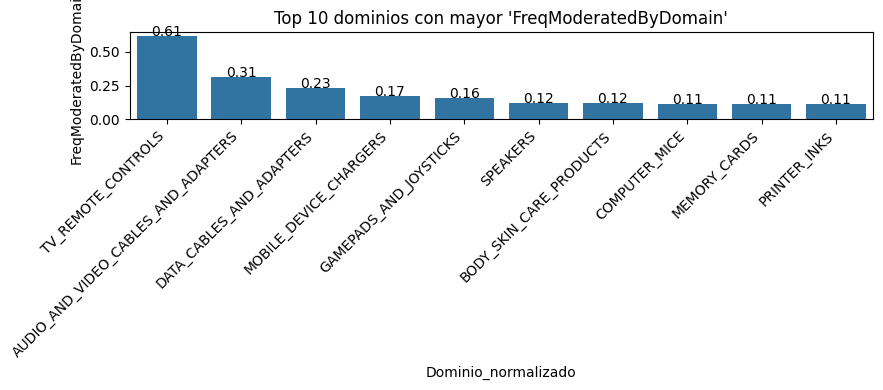

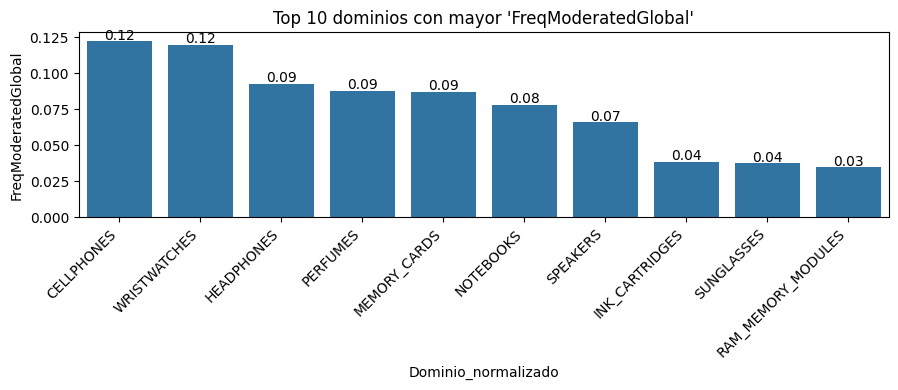

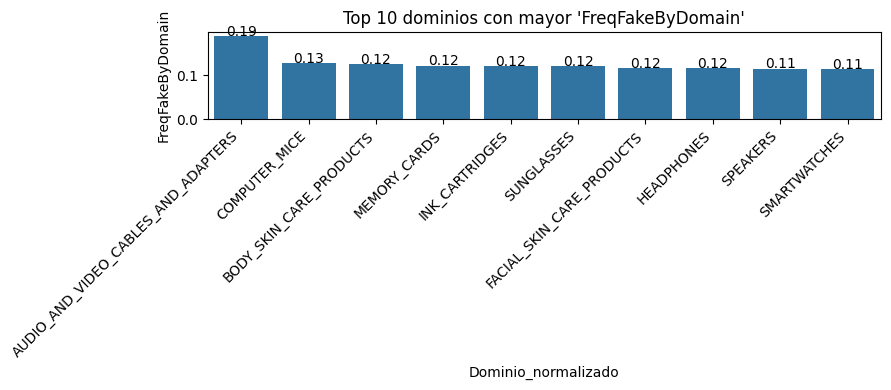

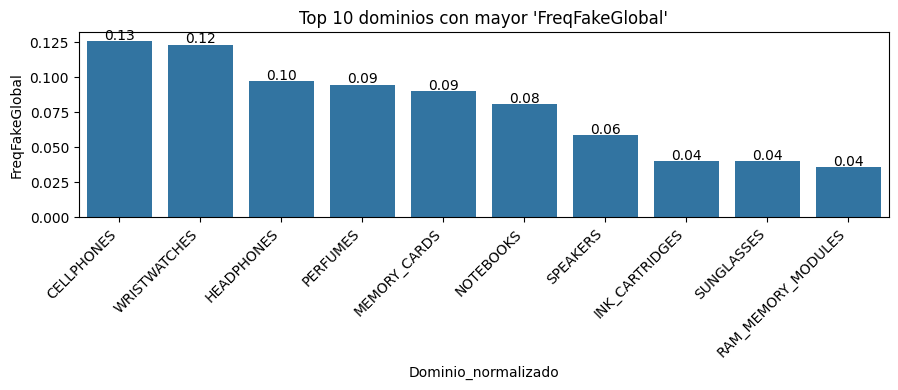

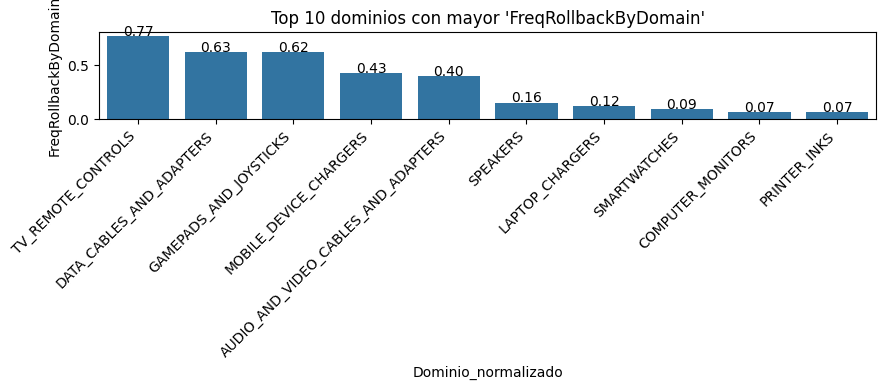

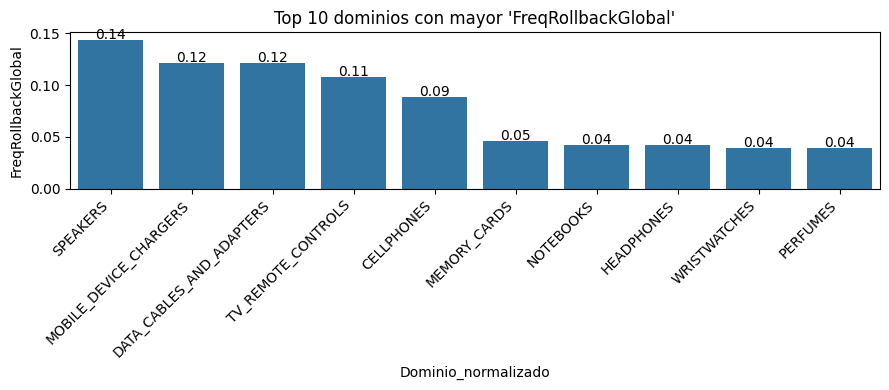

In [17]:
# Análisis por dominio

def analyze_flags_by_domain(df):
    """
    Calcula y muestra, agrupado por 'Dominio_normalizado':
    
    - TotalArticles: Cantidad total de artículos en cada dominio.
    - Moderated: Cantidad de artículos moderados en cada dominio.
    - Fake: Cantidad de artículos fake en cada dominio.
    - RollbackMod: Cantidad de artículos con rollback y moderados en cada dominio.
    
    Luego, para cada dominio se calculan las frecuencias y proporciones:
    
    1. FreqArticlesGlobal:
       Frecuencia relativa de artículos de cada dominio respecto al total global.
         = (# artículos del dominio) / (# artículos globales)
       
    2. FreqModeratedByDomain:
       Frecuencia relativa de moderados (POR dominio).
         = (# moderados del dominio) / (# total artículos del dominio)
       
    3. FreqModeratedGlobal:
       Frecuencia relativa de moderados (ENTRE dominios).
         = (# moderados del dominio) / (# total moderados en todo el dataset)
       
    4. FreqFakeByDomain:
       Frecuencia relativa de fake (POR dominio).
         = (# fake del dominio) / (# total artículos del dominio)
       
    5. FreqFakeGlobal:
       Frecuencia relativa de fake (ENTRE dominios).
         = (# fake del dominio) / (# total fake en todo el dataset)
       
    6. FreqRollbackByDomain:
       Frecuencia relativa de rollback dado moderado (POR dominio).
         = (# rollback & mod en dominio) / (# moderados del dominio)
       
    7. FreqRollbackGlobal:
       Frecuencia relativa de rollback dado moderado (ENTRE dominios).
         = (# rollback & mod en dominio) / (# rollback & mod global)
       
    Finalmente, se muestra un DataFrame con estas métricas y se generan gráficos de barras
    donde solo se ven los top 10 dominios con los valores más altos para cada métrica.
    
    Args:
        df (pd.DataFrame): DataFrame con al menos las columnas:
            ['Dominio_normalizado', 'Moderado', 'Fake', 'Rollback'] en 0 o 1.
    
    Uso:
        analyze_flags_by_domain(df_w_usd)
    """
    # Transformación datos para conteo
    cols = ['Moderado', 'Fake', 'Rollback']
    for col in cols:
        df[col] = df[col].astype(float)
    
    # Conteos globales
    total = len(df)
    total_mod_global = df['Moderado'].sum()
    total_fake_global = df['Fake'].sum()
    total_rollback_mod_global = df[(df['Rollback'] == 1) & (df['Moderado'] == 1)].shape[0]
    
    # Agrupar por Dominio_normalizado
    grouped = df.groupby('Dominio_normalizado')
    
    # Construir DataFrame con contadores básicos
    domain_stats = pd.DataFrame({
        'TotalArticles': grouped.size(),
        'Moderated': grouped['Moderado'].sum(),
        'Fake': grouped['Fake'].sum(),
        'RollbackMod': grouped.apply(lambda g: ((g['Rollback'] == 1) & (g['Moderado'] == 1)).sum())
    })
    
    # 1) Frecuencia relativa de artículos en cada dominio (respecto al total global)
    domain_stats['FreqArticlesGlobal'] = domain_stats['TotalArticles'] / total
    
    # 2) Frecuencia relativa de moderados POR dominio
    domain_stats['FreqModeratedByDomain'] = domain_stats['Moderated'] / domain_stats['TotalArticles']
    
    # 3) Frecuencia relativa de moderados ENTRE dominios
    #    (# moderados en el dominio) / (# total moderados a nivel global)
    domain_stats['FreqModeratedGlobal'] = (
        domain_stats['Moderated'] / total_mod_global 
        if total_mod_global > 0 else 0
    )
    
    # 4) Frecuencia relativa de fake POR dominio
    domain_stats['FreqFakeByDomain'] = domain_stats['Fake'] / domain_stats['TotalArticles']
    
    # 5) Frecuencia relativa de fake ENTRE dominios
    domain_stats['FreqFakeGlobal'] = (
        domain_stats['Fake'] / total_fake_global 
        if total_fake_global > 0 else 0
    )
    
    # 6) Frecuencia relativa de rollback dado moderado POR dominio
    #    (# rollback & mod en dominio) / (# moderados en dominio)
    domain_stats['FreqRollbackByDomain'] = domain_stats.apply(
        lambda row: row['RollbackMod'] / row['Moderated'] if row['Moderated'] > 0 else 0,
        axis=1
    )
    
    # 7) Frecuencia relativa de rollback dado moderado ENTRE dominios
    domain_stats['FreqRollbackGlobal'] = domain_stats.apply(
        lambda row: row['RollbackMod'] / total_rollback_mod_global if total_rollback_mod_global > 0 else 0,
        axis=1
    )
    
    # Mostramos la tabla completa con las métricas
    display(domain_stats)
    
    # --- Visualizar solo TOP 10 con las métricas más altas ---
    metrics_to_plot = [
        'FreqArticlesGlobal',
        'FreqModeratedByDomain',
        'FreqModeratedGlobal',
        'FreqFakeByDomain',
        'FreqFakeGlobal',
        'FreqRollbackByDomain',
        'FreqRollbackGlobal'
    ]
    
    for metric in metrics_to_plot:
        # Ordenamos descendentemente según la métrica actual y tomamos el top 10
        domain_stats_sorted = domain_stats.sort_values(by=metric, ascending=False).head(10)
        
        # Convertimos el índice (Dominio_normalizado) en columna para graficar
        domain_stats_sorted = domain_stats_sorted.reset_index().rename(columns={'Dominio_normalizado': 'Domain'})
        
        plt.figure(figsize=(9, 4))
        sns.barplot(
            x='Domain',
            y=metric,
            data=domain_stats_sorted
        )
        plt.title(f"Top 10 dominios con mayor '{metric}'")
        plt.xlabel("Dominio_normalizado")
        plt.ylabel(metric)
        plt.xticks(rotation=45, ha='right')
        
        # Agregar valores encima de cada barra
        for i, row in domain_stats_sorted.iterrows():
            plt.text(i, row[metric] + 0.001, f"{row[metric]:.2f}", ha='center')
        
        plt.tight_layout()
        plt.show()

# Ejemplo de uso en tu notebook:
analyze_flags_by_domain(df_w_usd)

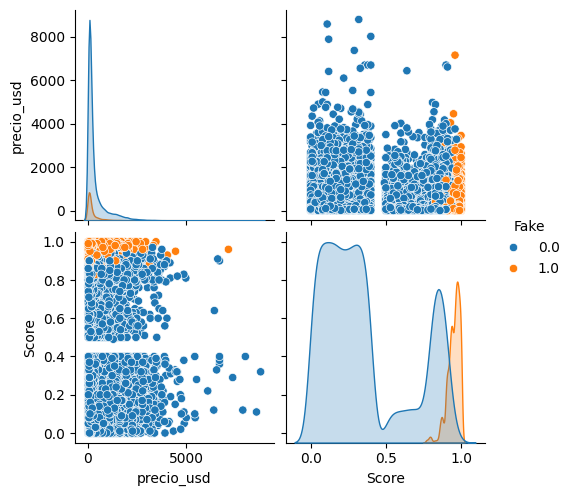

In [18]:
def pairwise_scatterplots(df, numeric_cols=None, hue='Fake'):
    """
    Genera un pairplot (matriz de scatter plots) con las variables numéricas.
    Cada gráfico de dispersión se colorea según la variable 'hue' (ej.: 'Fake').

    Args:
        df (pd.DataFrame): DataFrame con las columnas numéricas y la columna 'hue'.
        numeric_cols (list): Lista de nombres de columnas numéricas a incluir en el pairplot.
                             Si es None, selecciona todas las columnas numéricas de df.
        hue (str): Nombre de la columna categórica usada para colorear (ej.: 'Fake').

    Nota: Si incluyes muchas columnas numéricas, el pairplot puede ser muy grande.
          Puedes filtrar solo las más relevantes para evitar exceso de gráficos.
    """
    # Si no se provee una lista de columnas, tomamos todas las numéricas
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
    
    # Asegurar que la columna 'hue' está presente en el DataFrame
    if hue not in df.columns:
        raise ValueError(f"La columna '{hue}' no existe en el DataFrame.")
    
    # Seleccionar únicamente las columnas numéricas y la columna de 'hue'
    # para pasarlo a pairplot
    cols_for_plot = numeric_cols + [hue]
    data_for_plot = df[cols_for_plot].dropna()

    # Generar la matriz de gráficos
    sns.pairplot(data=data_for_plot, hue=hue, diag_kind='kde')
    plt.show()

# Uso:
pairwise_scatterplots(df_w_usd, numeric_cols=['precio_usd', 'Score'], hue='Fake')


In [19]:
df_w_usd

,element_id,site_id,seller_id,Dominio_normalizado,Titulo,Marca,Precio,Rule,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2,precio_usd
0,ARG1000130348,ARGENTINA,924394736,COMPUTER_PROCESSORS,Microprocesador Intel Core I3 12100 12mb Bx807...,Intel,222599.0,NaN,0.11,1,0.0,0.0,0.0,0,0,202.362727
1,ARG1002056504,ARGENTINA,60385780,COMPUTER_MONITORS,Monitor Gamer Samsung Con Pantalla De 25 60hz...,Samsung,767000.0,NaN,0.29,1,0.0,0.0,0.0,0,0,697.272727
2,ARG1002630435,ARGENTINA,1085316688,SUNGLASSES,Anteojos De Sol Polarizados Ray-ban Erika Clas...,Ray-Ban,246510.0,NaN,0.51,1,0.0,0.0,0.0,0,0,224.100000
3,ARG1003499360,ARGENTINA,189266308,HARD_DRIVES_AND_SSDS,Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...,Kingston,179999.0,NaN,0.32,1,0.0,0.0,0.0,0,0,163.635455
4,ARG1004623658,ARGENTINA,127503700,RAM_MEMORY_MODULES,Memoria Ram Valueram Color Verde 8gb 1 Kingsto...,Kingston,22399.0,NaN,0.80,1,0.0,0.0,0.0,0,0,20.362727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40367,PER9979201495,PERU,1906413812,SPEAKERS,Bocina Jbl Charge 5 Jblcharge5 Portátil Con Bl...,JBL,799.0,NaN,0.13,1,0.0,0.0,0.0,0,0,215.945946
40368,PER9979619481,PERU,699068980,HEADPHONES,Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...,JBL,299.0,NaN,0.80,1,0.0,0.0,0.0,0,0,80.810811
40369,PER9980515950,PERU,1510316564,SMARTWATCHES,Apple Watch Series 10 Gps Caja De Aluminio Ne...,Apple,2499.0,NaN,0.83,1,0.0,0.0,0.0,0,0,675.405405
40370,PER999421010,PERU,2495083952,WRISTWATCHES,Reloj Casio W218wd Acero Inoxidable Alarma Sum...,Casio,389.0,NaN,0.10,1,0.0,0.0,0.0,0,0,105.135135


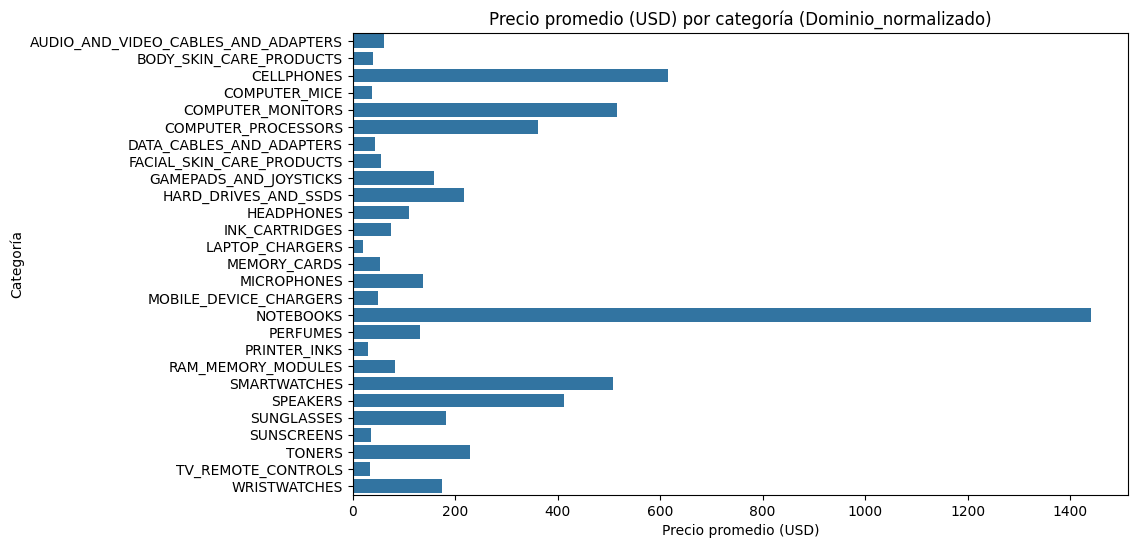

In [ ]:
# Relación entre la categoría (Dominio_normalizado) y el precio promedio en USD

def avg_price_by_category(df):
    """
    Calcula y grafica el precio promedio en USD por categoría (Dominio_normalizado).
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    avg_cat = df.groupby('Dominio_normalizado')['precio_usd'].mean().reset_index()
    avg_cat = avg_cat.rename(columns={'precio_usd': 'avg_price_usd'})
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_cat, x='avg_price_usd', y='Dominio_normalizado')
    plt.title("Precio promedio (USD) por categoría (Dominio_normalizado)")
    plt.xlabel("Precio promedio (USD)")
    plt.ylabel("Categoría")
    plt.show()

# Uso:
avg_price_by_category(df_w_usd)

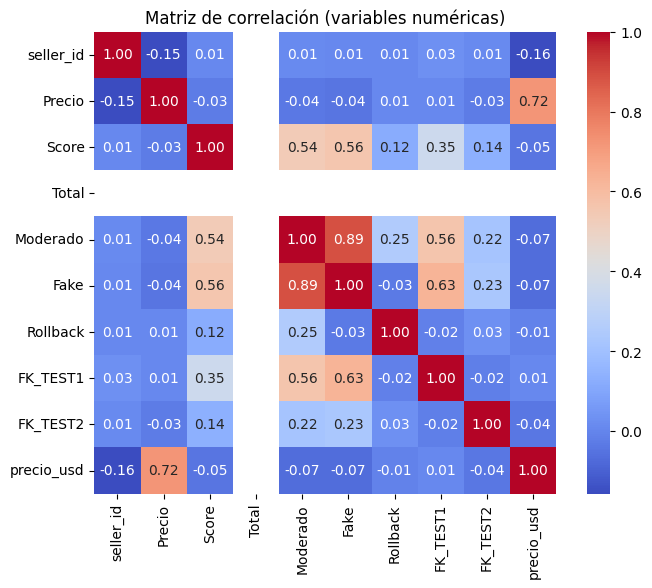

In [ ]:
# Matriz de correlaciones para variables numéricas

def plot_correlation_matrix(df):
    """
    Calcula la matriz de correlación para las variables numéricas y
    grafica un heatmap con Seaborn.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    # Seleccionar solo columnas numéricas
    num_cols = df.select_dtypes(include=[float, int]).columns
    corr_matrix = df[num_cols].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Matriz de correlación (variables numéricas)")
    plt.show()

# Uso:
plot_correlation_matrix(df_w_usd)

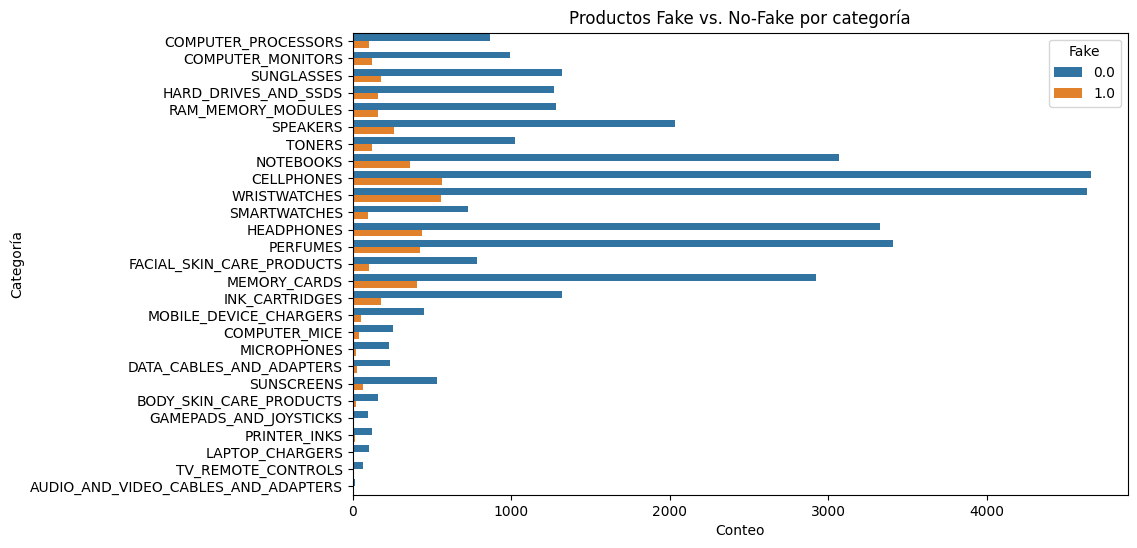

In [ ]:
# Conteo de productos Fake vs. No-Fake, según su categoría (Dominio_normalizado)

def fake_by_category(df):
    """
    Genera un gráfico de barras apiladas (o countplot con hue) que muestra
    la cantidad de productos Fake vs. No-Fake por categoría.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='Dominio_normalizado', hue='Fake')
    plt.title("Productos Fake vs. No-Fake por categoría")
    plt.xlabel("Conteo")
    plt.ylabel("Categoría")
    plt.legend(title='Fake')
    plt.show()

# Uso:
fake_by_category(df_w_usd)

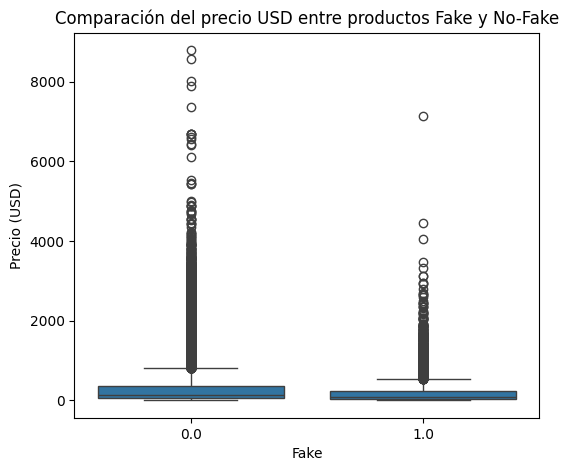

In [ ]:
# Comparación del precio medio en USD entre productos Fake y No-Fake

def compare_price_fake(df):
    """
    Realiza un boxplot que compara el precio en USD
    entre productos etiquetados como Fake y No-Fake.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
    """
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df, x='Fake', y='precio_usd')
    plt.title("Comparación del precio USD entre productos Fake y No-Fake")
    plt.xlabel("Fake")
    plt.ylabel("Precio (USD)")
    plt.show()

# Uso:
compare_price_fake(df_w_usd)